In [8]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 487.6 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.1 MB 744.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.1 MB 1.6 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.1 MB 2.5 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 2.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 2.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.2/2.1 MB 3.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.2/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 3.7 M

In [1]:
pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from cv2 import dnn_superres
import os


True

In [14]:
def compress_image(image, compression_quality):
    # Convert image to JPEG format with compression quality
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), compression_quality]
    _, compressed_image = cv2.imencode('.jpg', image, encode_param)
    # Decode the compressed image
    decompressed_image = cv2.imdecode(compressed_image, 1)
    return decompressed_image

In [32]:
def getSize(path):
    image_size_bytes = os.path.getsize(path)
    # Convert bytes to kilobytes
    image_size_kb = image_size_bytes / 1024.0
    return image_size_kb


### Lossy Compressing the image

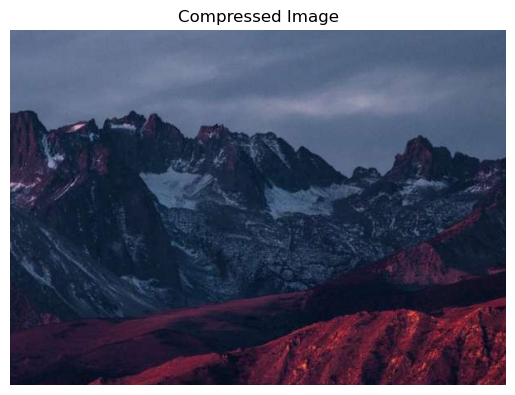

Size of the Compressed image :  320.689453125  kB
Size of the Original image :  430.79296875  kB


In [58]:
image_path = 'images/mountains.png'
input_image = cv2.imread(image_path)

compressed_image = compress_image(input_image, compression_quality=60)

# Display or save the compressed image as needed
plt.imshow(cv2.cvtColor(compressed_image,cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title("Compressed Image")
plt.show()

compressed_image_path = './compressed_images/mountains_compressed.png'
cv2.imwrite(compressed_image_path,compressed_image)

image_size_kb1 = getSize(compressed_image_path)
image_size_kb2 = getSize(image_path)
print("Size of the Compressed image : ",image_size_kb1," kB")
print("Size of the Original image : ",image_size_kb2," kB")


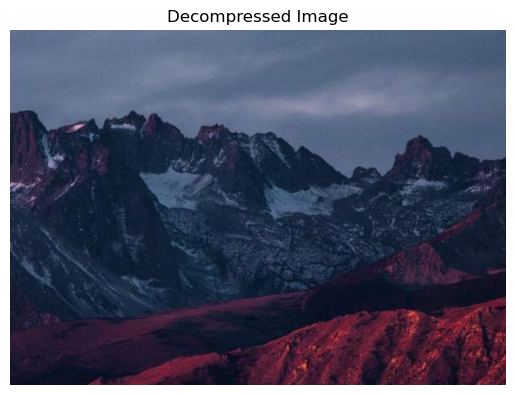

In [61]:

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read image
image = cv2.imread('./compressed_images/mountains_compressed.png')

# Read the desired model
path = "./models/EDSR_x4.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 2)

# Upscale the image
result = sr.upsample(image)
# result = cv2.resize(result,(602, 431))
# Save the image
cv2.imwrite("./upscaled_mountains.png", result)

plt.imshow(cv2.cvtColor(result,cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.title('Decompressed Image')
plt.show()


In [60]:
print(result.shape)
print(input_image.shape)

(431, 602, 3)
(431, 602, 3)
